
Quantum Edge Detection Circuit:


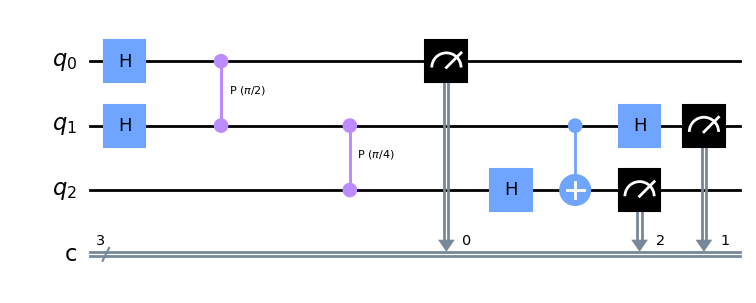

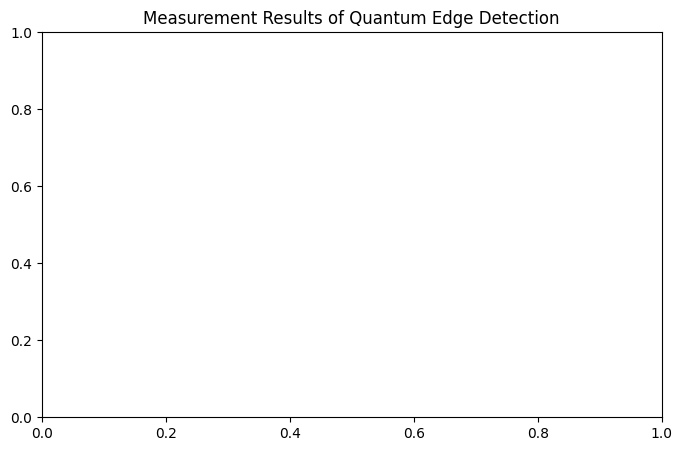

In [1]:
#-------------------------------------------------------------------------
# Quantum Edge Detection Circuit with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 3.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import circuit_drawer, plot_histogram

#-------------------------------------------------------------------------
# Step 1: Creates a Quantum Circuit for Edge Detection
# Step 2: Uses Quantum Phase Estimation (QPE) to enhance edges
# Step 3: Applies Quantum Fourier Transform (QFT) to analyze pixel frequency
#-------------------------------------------------------------------------
# Define Quantum Edge Detection Circuit
#-------------------------------------------------------------------------
def create_edge_detection_circuit():
    qc = QuantumCircuit(3, 3)  # 3 qubits, 3 classical bits (for measurement)

    # Initialize |+> states to create superposition
    qc.h(0)
    qc.h(1)

    # Apply Quantum Phase Estimation (simulating edge detection)
    qc.cp(np.pi / 2, 0, 1)  # Controlled Phase Shift
    qc.cp(np.pi / 4, 1, 2)  # Smaller Phase Shift for enhancement

    # Apply Quantum Fourier Transform (QFT) to analyze frequency components
    qc.h(2)
    qc.cx(1, 2)
    qc.h(1)

    # Measure the qubits
    qc.measure([0, 1, 2], [0, 1, 2])

    return qc

# Create the quantum edge detection circuit
qc = create_edge_detection_circuit()

#-------------------------------------------------------------------------
# Visualization Functions
#-------------------------------------------------------------------------

# Function to plot the quantum circuit
def plot_quantum_circuit(qc):
    print("\nQuantum Edge Detection Circuit:")
    display(circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'}))

# Function to simulate measurement outcomes
def measure_and_plot(qc):
    simulator     = AerSimulator()
    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results of Quantum Edge Detection")
    plt.show()

#-------------------------------------------------------------------------
# Execute Visualizations
#-------------------------------------------------------------------------
plot_quantum_circuit(qc)
measure_and_plot(qc)
